In [ ]:
#Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [ ]:
! pip install uszipcode
from uszipcode import SearchEngine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.5/121.5 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 KB 3.4 MB/s eta 0:00:00


/usr/local/lib/python3.8/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
#Dataset

df = pd.read_csv('https://raw.githubusercontent.com/ipauchner/DNC/main/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Verificando informação geral do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
#Criando uma nova coluna vazia para cidade
df['City'] = np.nan

In [ ]:
#Preenchendo a coluna City usando o SearchEngine do uszipcode
engine = SearchEngine()
for index, row in df.iterrows():
  zipcode = engine.by_zipcode(df['zipcode'][index])
  df['City'][index] = zipcode.major_city

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


<ipython-input-5-a67ddce614d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'][index] = zipcode.major_city
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish


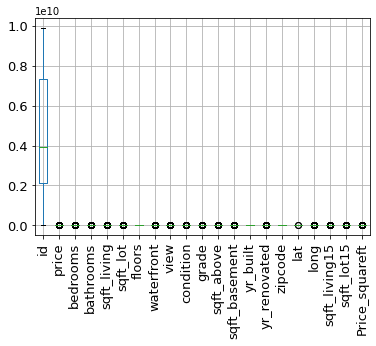

In [ ]:
#Checando os outliers
df.boxplot(grid=True, rot=90, fontsize=13)

<Figure size 720x720 with 0 Axes>

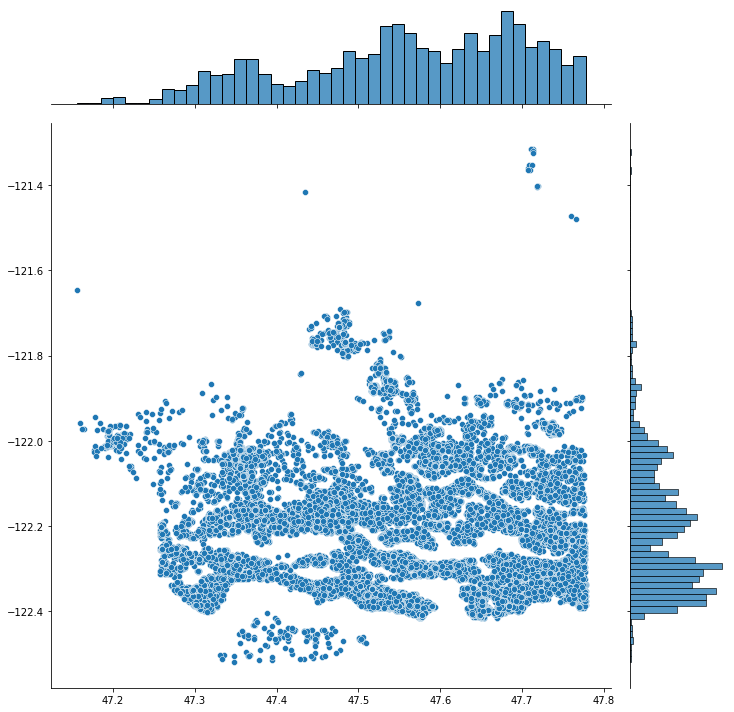

In [ ]:
#Visualizando a quantidade de casas baseando-se na latitude e longitude
plt.figure(figsize=(10,10))
sns.jointplot(x=df.lat.values, y=df.long.values, height=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

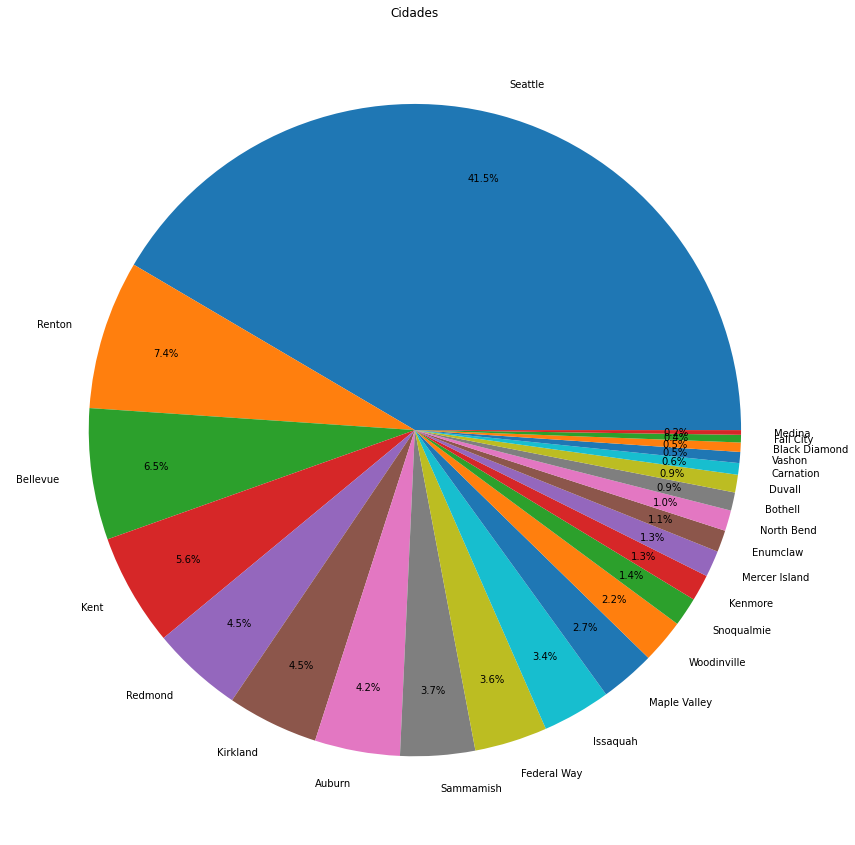

In [ ]:
#percentual de imóveis por cidade
plt.figure(figsize=(15, 15))
plt.title('Cidades')
plt.pie(df['City'].value_counts(), labels=df['City'].value_counts().index, autopct='%.1f%%', pctdistance=.8)
plt.show()

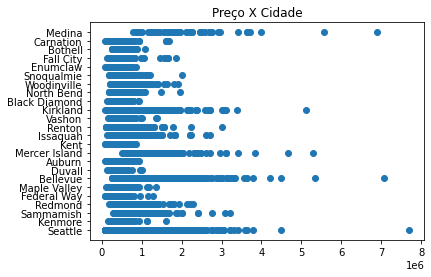

In [ ]:
#Seattle é onde tem a maior quantidade de casas
plt.scatter(df.price, df.City)
plt.title("Preço X Cidade")
plt.show()

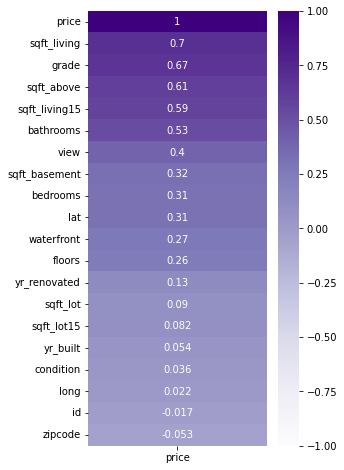

In [ ]:
#Verificando maiores correlações
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Purples')

In [ ]:
#Maior correlação com a coluna price é a coluna sqft_living.

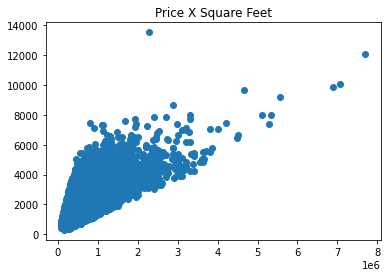

In [ ]:
plt.scatter(df.price, df.sqft_living)
plt.title("Price X Square Feet")
plt.show()

In [ ]:
# Criando e preenchendo a coluna preço por área habitável

for index, row in df.iterrows():
  df['Price_squareft'] = df['price']/df['sqft_living']

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,Price_squareft
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle,188.050847
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle,209.338521
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore,233.766234
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle,308.163265
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish,303.571429


In [ ]:
#Verificando imoveis duplicados para ver os que foram vendidos mais de uma vez

df[df.duplicated(['id'], keep=False)].sort_values(by='id')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,Price_squareft
2497,1000102,20150422T000000,300000.0,6,3.00,2400,9373,2.0,0,0,...,0,1991,0,98002,47.3262,-122.214,2060,7316,Auburn,125.000000
2496,1000102,20140916T000000,280000.0,6,3.00,2400,9373,2.0,0,0,...,0,1991,0,98002,47.3262,-122.214,2060,7316,Auburn,116.666667
16814,7200179,20141016T000000,150000.0,2,1.00,840,12750,1.0,0,0,...,0,1925,0,98055,47.4840,-122.211,1480,6969,Renton,178.571429
16815,7200179,20150424T000000,175000.0,2,1.00,840,12750,1.0,0,0,...,0,1925,0,98055,47.4840,-122.211,1480,6969,Renton,208.333333
11434,109200390,20141020T000000,250000.0,3,1.75,1480,3900,1.0,0,0,...,0,1980,0,98023,47.2977,-122.367,1830,6956,Federal Way,168.918919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,9828200460,20140627T000000,260000.0,2,1.00,700,4800,1.0,0,0,...,0,1922,0,98122,47.6147,-122.300,1440,4800,Seattle,371.428571
15200,9834200305,20150210T000000,615000.0,3,1.00,1790,3876,1.5,0,0,...,700,1904,0,98144,47.5750,-122.288,1360,4080,Seattle,343.575419
15199,9834200305,20140716T000000,350000.0,3,1.00,1790,3876,1.5,0,0,...,700,1904,0,98144,47.5750,-122.288,1360,4080,Seattle,195.530726
1085,9834200885,20140717T000000,360000.0,4,2.50,2080,4080,1.0,0,0,...,1040,1962,0,98144,47.5720,-122.290,1340,4080,Seattle,173.076923


In [ ]:
#Colocando duplicados em formato de serie
dup = df[df.id.duplicated(keep=False)].groupby('id')['price'].apply(list)
print(dup.to_string()) #Ficar mais facil de ler

id
1000102                 [280000.0, 300000.0]
7200179                 [150000.0, 175000.0]
109200390               [245000.0, 250000.0]
123039336               [148000.0, 244900.0]
251300110               [225000.0, 358000.0]
302000375               [169100.0, 250000.0]
324000530               [201500.0, 459000.0]
526059224               [260000.0, 470000.0]
641900050               [335000.0, 499950.0]
643300040               [481000.0, 719521.0]
705730280               [325000.0, 335000.0]
722039087               [220500.0, 329000.0]
723049156               [149000.0, 284700.0]
726049190               [287500.0, 431000.0]
795000620     [115000.0, 124000.0, 157000.0]
937000330               [157000.0, 246500.0]
1036400200              [661000.0, 697000.0]
1139600270              [300000.0, 310000.0]
1217000340              [185000.0, 340000.0]
1219000473              [164950.0, 371000.0]
1231000510              [263000.0, 510000.0]
1232000810              [340000.0, 537000.0]
1237500

In [ ]:
type(dup)

pandas.core.series.Series

In [ ]:
dup_df = pd.DataFrame({'id':dup.index, 'price':dup.values}) #Serie => Dataframe
dup_df.at[14, 'price'] = [115000.0, 157000.0] #Esse imóvel vendido 3 vezes, colocando para apenas a primeira e ultima venda
dup_df.head(20) 

,id,price
0,1000102,"[280000.0, 300000.0]"
1,7200179,"[150000.0, 175000.0]"
2,109200390,"[245000.0, 250000.0]"
3,123039336,"[148000.0, 244900.0]"
4,251300110,"[225000.0, 358000.0]"
5,302000375,"[169100.0, 250000.0]"
6,324000530,"[201500.0, 459000.0]"
7,526059224,"[260000.0, 470000.0]"
8,641900050,"[335000.0, 499950.0]"
9,643300040,"[481000.0, 719521.0]"


In [ ]:
#Separando a coluna de preços

split = pd.DataFrame(dup_df['price'].tolist(), columns=['p1', 'p2'])
split

,p1,p2
0,280000.0,300000.0
1,150000.0,175000.0
2,245000.0,250000.0
3,148000.0,244900.0
4,225000.0,358000.0
...,...,...
171,195000.0,322000.0
172,1895000.0,1940000.0
173,260000.0,430000.0
174,350000.0,615000.0


In [ ]:
#Concatenando o dataframe de duplicados e o de preços

dup_df = pd.concat([dup_df, split], axis=1)
dup_df

,id,price,p1,p2
0,1000102,"[280000.0, 300000.0]",280000.0,300000.0
1,7200179,"[150000.0, 175000.0]",150000.0,175000.0
2,109200390,"[245000.0, 250000.0]",245000.0,250000.0
3,123039336,"[148000.0, 244900.0]",148000.0,244900.0
4,251300110,"[225000.0, 358000.0]",225000.0,358000.0
...,...,...,...,...
171,9407110710,"[195000.0, 322000.0]",195000.0,322000.0
172,9809000020,"[1895000.0, 1940000.0]",1895000.0,1940000.0
173,9828200460,"[260000.0, 430000.0]",260000.0,430000.0
174,9834200305,"[350000.0, 615000.0]",350000.0,615000.0


In [ ]:
#Retirando a coluna price
dup_df = dup_df.drop('price', axis=1)
dup_df

,id,p1,p2
0,1000102,280000.0,300000.0
1,7200179,150000.0,175000.0
2,109200390,245000.0,250000.0
3,123039336,148000.0,244900.0
4,251300110,225000.0,358000.0
...,...,...,...
171,9407110710,195000.0,322000.0
172,9809000020,1895000.0,1940000.0
173,9828200460,260000.0,430000.0
174,9834200305,350000.0,615000.0


In [ ]:
#Criando nova coluna com a subtração da revenda pela a primeira venda para saber se deu lucro ou prejuizo

dup_df['profit_loss'] = dup_df['p2'] - dup_df['p1']
dup_df

,id,p1,p2,profit_loss
0,1000102,280000.0,300000.0,20000.0
1,7200179,150000.0,175000.0,25000.0
2,109200390,245000.0,250000.0,5000.0
3,123039336,148000.0,244900.0,96900.0
4,251300110,225000.0,358000.0,133000.0
...,...,...,...,...
171,9407110710,195000.0,322000.0,127000.0
172,9809000020,1895000.0,1940000.0,45000.0
173,9828200460,260000.0,430000.0,170000.0
174,9834200305,350000.0,615000.0,265000.0


In [ ]:
# 5 Imoveis que geraram maior lucro e 5 que geraram menor

dup_df.sort_values(by=['profit_loss'], ascending=False)

,id,p1,p2,profit_loss
113,6021500970,345000.0,874950.0,529950.0
147,7977201065,350000.0,740000.0,390000.0
131,7409700215,550000.0,921500.0,371500.0
100,4443800385,410000.0,778100.0,368100.0
57,2568300045,305000.0,649950.0,344950.0
...,...,...,...,...
159,8682262400,430000.0,419950.0,-10050.0
63,2767603612,500000.0,489000.0,-11000.0
88,4139420590,1212500.0,1200000.0,-12500.0
61,2726049071,510000.0,489950.0,-20050.0


In [ ]:
df.index[df['id'] == 6021500970]

Int64Index([19335, 19336], dtype='int64')

In [ ]:
#Ids dos melhores imóveis no dataset
id1 = df.index[df['id'] == 6021500970].tolist()
id2 = df.index[df['id'] == 7977201065].tolist()
id3 = df.index[df['id'] == 7409700215].tolist()
id4 = df.index[df['id'] == 4443800385].tolist()
id5 = df.index[df['id'] == 2568300045].tolist()
print(f'Casa 1 :{id1}')
print(f'Casa 2 :{id2}')
print(f'Casa 3 :{id3}')
print(f'Casa 4 :{id4}')
print(f'Casa 5 :{id5}')

Casa 1 :[19335, 19336]
Casa 2 :[8915, 8916]
Casa 3 :[3298, 3299]
Casa 4 :[9279, 9280]
Casa 5 :[9720, 9721]


In [ ]:
#Lista melhores imóveis
df.loc[[19335, 8915, 3298, 9279, 9720]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,Price_squareft
19335,6021500970,20140528T000000,345000.0,2,1.00,1080,4000,1.0,0,0,...,0,1940,0,98117,47.6902,-122.387,1530,4240,Seattle,319.444444
8915,7977201065,20141104T000000,350000.0,3,1.75,1380,4590,1.0,0,0,...,450,1950,0,98115,47.6841,-122.293,1320,4692,Seattle,253.623188
3298,7409700215,20140606T000000,550000.0,3,1.50,1900,5000,1.5,0,0,...,260,1926,0,98115,47.6779,-122.294,2090,5000,Seattle,289.473684
9279,4443800385,20140818T000000,410000.0,2,1.00,1480,4080,1.0,0,0,...,430,1949,0,98117,47.6842,-122.393,1310,4080,Seattle,277.027027
9720,2568300045,20140625T000000,305000.0,6,2.00,1900,8240,1.0,0,0,...,700,1964,0,98125,47.7037,-122.296,1900,8240,Seattle,160.526316


In [ ]:
#Mapa para dos 5 melhores
import folium

In [ ]:
m = folium.Map(location=[47.6902, -122.387], zoom_start=11)

folium.Marker(
    location = [47.6902 , -122.387], 
    radiuns = 50,
    color = 'crimson',
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location = [47.6841, -122.293], 
    radiuns = 50,
    color = 'crimson',
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location = [47.6779, -122.294], 
    radiuns = 50,
    color = 'crimson',
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location = [47.6842, -122.393], 
    radiuns = 50,
    color = 'crimson',
    fill=True,
    fill_color="#3186cc",
).add_to(m)

folium.Marker(
    location = [47.7037,-122.296], 
    radiuns = 50,
    color = 'crimson',
    fill=True,
    fill_color="#3186cc",
).add_to(m)

In [ ]:
m